In [37]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [38]:
# Conjunto A
mean = [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 250).T

# Conjunto B
mean = [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 250).T

# Combinação dos dois conjuntos
c = np.concatenate((a, b), axis=1)
c = c.T
np.random.shuffle(c)
c = c.T


In [39]:
pontos = c.T.tolist()

def distancia(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def nearest_points(pontos):
    min_dist = float('inf')     # inicaliza a distância mínima com infinito
    par = (None, None)          # par mais curto

    for i in range(len(pontos)):
        for j in range(i+1, len(pontos)):  # começa em i+1 para evitar repetições
            d = distancia(pontos[i], pontos[j])
            if d < min_dist:                # se for menor que a distância mínima anterior
                min_dist = d                # guarda o novo mínimo
                par = (i, j)                # e o respetivo par
    return par


Restam apenas dois pontos:
[[-3.32649479 -4.33571391]
 [ 0.87304467  2.8036369 ]]
[array([[-1.75430435, -2.58103844],
       [-1.6404147 , -6.82040517],
       [-1.86700289, -3.9567837 ],
       [-1.08170412, -1.43217504],
       [-2.96251578, -3.19535732],
       [ 2.74379558,  3.02962531],
       [ 5.10087533,  1.98160056],
       [-3.49457518, -1.17310948],
       [-3.06376571, -4.33714805],
       [ 3.58756306,  2.66936785],
       [ 2.60089164,  2.74493652],
       [ 4.00804718,  3.23438517],
       [ 2.92085331,  4.95023644],
       [-2.69800376, -2.71333651],
       [ 3.68973779,  2.05525059],
       [-4.28530964,  0.49203285],
       [ 2.62311109,  4.87305387],
       [-2.88554484, -5.82850439],
       [ 4.89402845,  3.92385603],
       [-0.78081264,  4.51144719],
       [ 0.90838181,  1.20239031],
       [ 2.46702624,  2.27080299],
       [ 3.43392664,  2.93621936],
       [ 4.81547367,  3.58409407],
       [ 1.73136198,  3.57268491],
       [-3.64082986, -1.94902377],
       

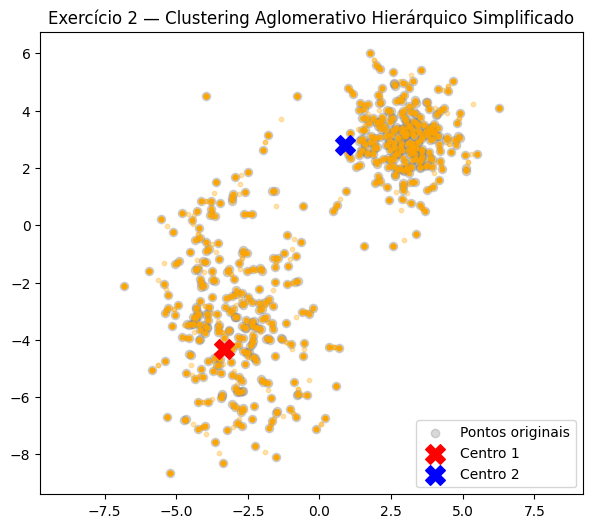

In [ ]:
historico = []
while len(pontos) > 2:
    i, j = nearest_points(pontos)
    
    # calcular média dos dois pontos mais próximos
    media = [
        (pontos[i][0] + pontos[j][0]) / 2,
        (pontos[i][1] + pontos[j][1]) / 2
    ]
    
    
    # remover os dois pontos e adicionar o novo ponto médio
    pontos.pop(max(i, j))  # remover primeiro o de índice maior
    pontos.pop(min(i, j))
    pontos.append(media)

# Resultado final (dois pontos finais)
print("Restam apenas dois pontos:")
print(np.array(pontos))

# Plot
plt.figure(figsize=(7,6))
plt.scatter(c[0], c[1], color='gray', alpha=0.3, label='Pontos originais')

# Mostrar os dois pontos finais
plt.scatter(pontos[0][0], pontos[0][1], color='red', marker='X', s=200, label='Centro 1')
plt.scatter(pontos[1][0], pontos[1][1], color='blue', marker='X', s=200, label='Centro 2')
plt.axis("equal")
plt.title("Exercício 2 — Clustering Aglomerativo Hierárquico Simplificado")
plt.legend()
plt.show()